# Group 33 - Proposal #

# Introduction

## start with background information
Q: Based on their medical profile, what is the diabetes status of a patient?

info on dataset used to answer this question

# Preliminary exploratory data analysis


## Reading and Wrangling

In [123]:
library(tidyverse)
library(tidymodels)

In [124]:
url <- "https://raw.githubusercontent.com/billiehbl/project_group33/main/diabetes_prediction_dataset.csv"
diabetes_data <- read_csv(url)

tidy_diabetes <- diabetes_data |> filter(smoking_history != "No Info") |> filter(gender != 'Other')|>
    filter(age >= 2)|> mutate(diabetes = as_factor(diabetes))

head(tidy_diabetes)

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Female,80,0,1,never,25.19,6.6,140,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5.0,155,0
Male,76,1,1,current,20.14,4.8,155,0
Female,20,0,0,never,27.32,6.6,85,0
Female,44,0,0,never,19.31,6.5,200,1


## Splitting into training and testing

In [125]:
diabetes_split <- initial_split(tidy_diabetes, prop = 0.75, strata = diabetes)
diabetes_train <- training(diabetes_split)
diabetes_train = diabetes_train[sample(1:nrow(diabetes_train)), ] # shuffles data frame
diabetes_testing <- testing(diabetes_split)

## Summarize

In [126]:
# fivenum(diabetes_train$bmi)

## Visualize

In [127]:
# Using only testing data

age_summary = diabetes_train |> group_by(diabetes, age)|>
        summarize(num_age = n())|> filter(diabetes == 1)

bmi_summary = diabetes_train |> filter(diabetes == 1)

`summarise()` has grouped output by 'diabetes'. You can override using the
`.groups` argument.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



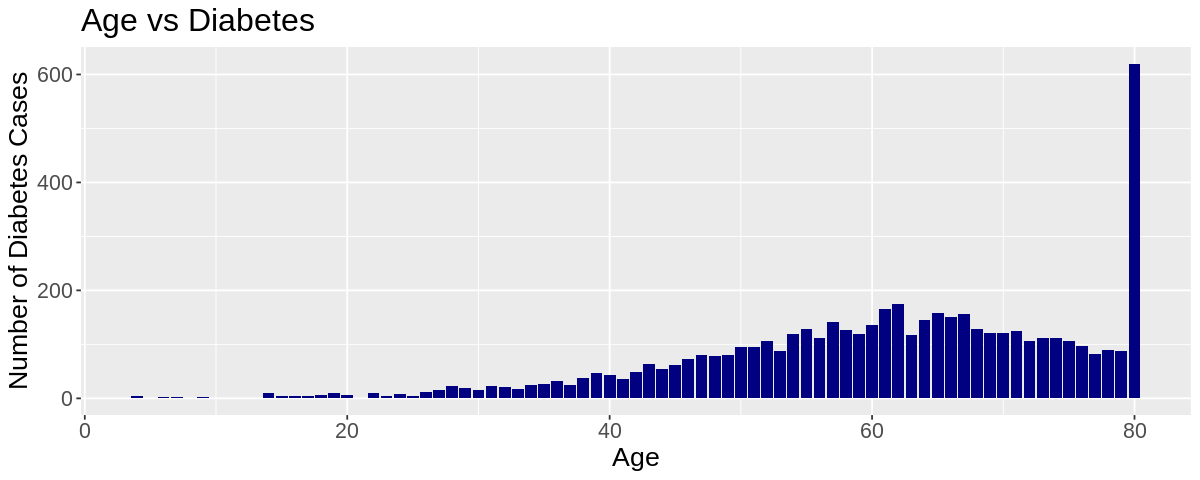

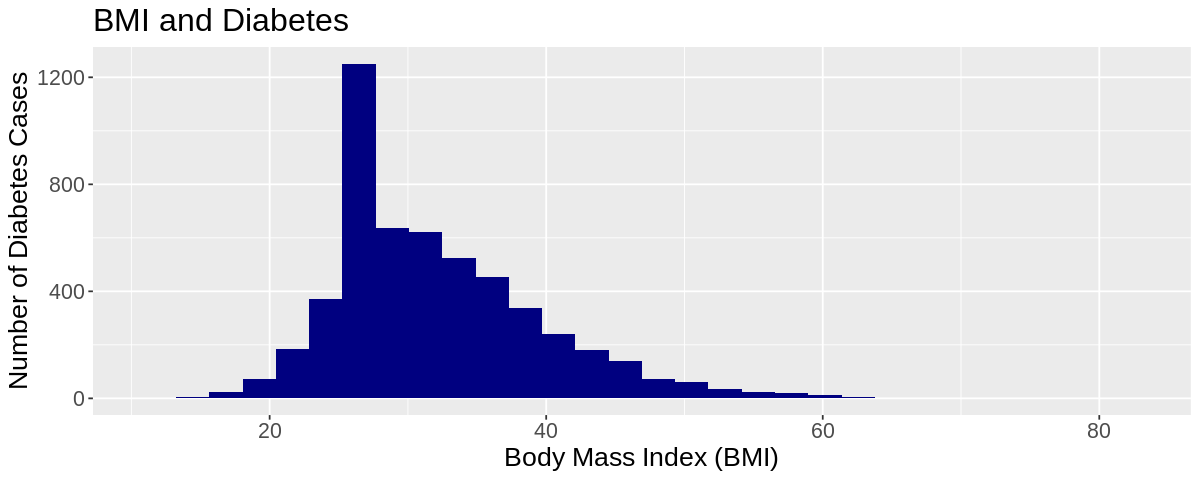

In [128]:
options(repr.plot.width = 10, repr.plot.height = 4)

age_plot = ggplot(age_summary, aes(x = age, y = num_age)) + geom_bar(stat = "identity", fill = "navy") + 
      labs(x = 'Age', y = 'Number of Diabetes Cases', title = "Age vs Diabetes") +
      theme(text = element_text(size = 16))

bmi_hist = ggplot(bmi_summary, aes(x = bmi)) + geom_histogram(fill='navy') + 
      labs(x = 'Body Mass Index (BMI)', y = 'Number of Diabetes Cases', title = "BMI and Diabetes") +
      theme(text = element_text(size = 16))
age_plot
bmi_hist

# Explain the anomalies in the graphs?

# 1. People die and hence the decline after 70. And if they live, they are likely to get diabetes due to their age.

# 2. Very few people with bmi's over 30. Genetic predesposition to diabetes.

# Methods

# Expected Outcomes and Significance

In [3]:
#What do you expect to find?

#We expect to find that those who score highest in the all of the variables (gender, age, hypertension, heart_disease, 
#smoking_history, bmi, HbA1c_level, blood_glucose_level) will be more likely to be diagnosed with diabetes 
#compared to those who scored lower in these categories.

#What impact could such findings have?

#By analyzing these variables as a collective group, researchers can develop predictive models, risk assessment 
#tools, and interventions to identify the individuals who are at high risk for diabetes. Moreover, these 
#findings can help healthcare professionals initiate prevention strategies, provide early interventions, and even
#improve diabetes management in affected individuals.

#What future questions could this lead to?

#Future questions this data can lead to is how do these variables interact with other factors such as genetic 
#predispositions, socioeconomic status, or lifestyle factors, to impact the susceptibility of being diagnosed with 
#diabetes.
#Furthermore, this can lead to other future questions such as if we combine these variables with certain biomarkers 
#or genetic markers it can enhance the early dectect of diabetes.
#Lastly, we have only shown BMI vs diabetes and Age vs diabetes in the graphs above; however, it would also be 
#reasonable to have future questions regarding the relationship between all the different variables in the dataset
#and diabetes. For example, how does blood glucose levels correlate with diabetes diagnosis and risk assessment?
#How does smoking history influence the risk and progression of diabetes? 